<a href="https://colab.research.google.com/github/hfsuluova/CE888/blob/main/Lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
np.set_printoptions(precision = 3)

In [9]:
#To create Header from 0 to 100
title = []
for i in range(101):
  title.append(str(i))

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', names=title)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-7.86,99.00,99.00,

In [11]:
#Dropping the column contains rating numbers, column '0'
df1 = df.copy()
df1.drop('0',axis=1,inplace=True)
df2 = df1.copy()
vs = df1.copy()
rate_nr = df['0']

In [12]:
#Replacing 99.00 to NaN values which represent as not rated.
df1.replace(99.00, np.NaN, inplace=True)


In [13]:
#Getting all the values are 100% rated (No unrated)
a = np.where(rate_nr==100)
b = pd.DataFrame(columns=title[1:])
for index in a:
  vs.iloc[index,:]
possible_validation = vs.iloc[index,:]
possible_validation

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,8.20,-7.86,-6.94,-7.96,0.29,-9.90,-7.09,-7.18,1.02,-0.29,-4.71,-7.43,1.12,-8.25,3.79,0.10,3.45,-3.45,7.57,-4.17,-0.44,9.27,5.83,-3.40,-5.44,1.60,-7.14,3.01,-6.07,5.68,...,-3.20,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2.09,-9.90,-3.79,0.49,-7.86,-9.85,1.80,-4.17,-2.38,-9.13,-8.88,3.54,-4.56,-5.44,-5.97,-9.90,-0.34,-4.13,-0.10,-0.24,-7.96,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,-2.91,-0.29,-4.85,-0.49,-8.74,-6.99,-8.74,-2.91,-3.35,-0.29,3.98,-1.60,-0.29,1.21,3.79,2.91,4.85,2.28,0.97,-0.29,6.36,0.53,-0.29,4.66,3.35,0.97,-3.11,-1.84,4.42,-4.42,...,1.21,5.53,1.41,-6.50,4.85,4.85,2.62,1.41,6.36,1.41,-4.76,4.17,-2.04,-6.31,-0.29,-0.29,0.78,-0.29,-0.29,-0.29,-0.29,-3.20,-0.29,-3.20,-3.40,-0.29,-0.29,5.73,4.56,-2.23,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
11,1.31,1.80,2.57,-2.38,0.73,0.73,-0.97,5.00,-7.23,-1.36,3.83,1.75,5.63,-2.86,-1.80,-2.04,5.53,-0.29,-0.58,1.36,2.43,0.63,-4.61,-4.37,-1.65,-1.36,7.57,-0.15,5.97,-3.50,0.24,4.27,-0.68,-3.79,7.62,5.15,2.43,0.10,0.83,-2.04,...,-0.15,-0.24,1.46,-2.14,2.43,-2.43,-5.10,-0.49,0.15,-2.62,-2.91,1.12,1.70,0.00,2.04,3.06,-4.47,2.04,1.12,3.30,1.46,0.68,-2.57,-0.63,0.58,-0.63,1.89,2.38,6.21,-2.52,1.46,1.70,0.29,-3.30,3.45,5.44,4.08,2.48,4.51,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24958,-2.91,-1.89,-2.86,-1.99,-7.52,-4.66,-7.52,6.02,-3.83,-4.42,-4.81,-2.14,-0.97,-3.64,-5.44,-6.36,-7.57,-6.80,-6.12,-3.93,-7.09,-1.89,-2.14,-1.89,-4.22,-4.95,-7.18,-3.25,-4.13,-3.06,-7.52,-4.22,-3.64,-2.91,-3.59,-5.78,-2.48,-4.27,-5.00,-4.66,...,-4.90,-0.44,-3.98,-1.17,-3.79,-4.90,-4.61,-4.90,-0.44,-1.99,-3.01,-6.46,-5.92,-3.45,-2.38,-3.98,-4.56,-4.13,-2.77,-3.74,-4.08,-0.10,-6.07,-3.11,-2.28,-3.69,-4.76,-1.26,-1.26,-1.26,-5.68,-5.68,-2.82,-4.61,-4.37,-3.93,-0.15,-0.87,-1.99,-1.80
24962,4.85,3.83,4.13,-5.53,2.14,-4.66,0.10,-1.75,0.44,0.39,-5.34,6.21,-6.89,-1.07,-6.70,-9.71,6.55,-5.73,-7.86,-7.82,6.12,8.16,0.00,-7.14,1.84,2.04,5.10,-1.46,5.00,4.81,2.67,-2.43,-9.08,8.30,2.96,-1.89,-8.06,-5.10,0.24,3.88,...,-1.46,1.17,-6.36,-8.25,5.00,2.04,-8.30,0.24,3.20,4.85,-8.16,5.49,5.92,5.24,-6.80,-9.27,-2.09,6.31,-7.77,5.29,-0.19,2.91,0.05,-2.77,1.65,-5.24,3.45,-3.50,1.07,4.47,-8.30,-9.56,-5.34,-3.50,2.04,-6.31,-4.42,3.06,-1.26,-6.36
24967,-0.29,-0.29,-0.29,-0.29,-1.84,0.10,-3.01,-0.29,0.49,-0.29,1.26,0.49,-0.29,-0.10,-0.29,-0.29,-1.65,0.87,-0.29,-0.29,0.29,0.68,-0.29,-0.29,-0.29,0.87,-0.29,0.68,-1.46,0.49,0.29,1.07,-0.29,-0.29,-0.29,1.84,0.10,-0.29,0.87,-0.

In [14]:
ppp= round(len(df1)*0.1)
validation_set = possible_validation.sample(frac=ppp/len(possible_validation), replace=True, random_state=1)
validation_set

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
17944,4.76,5.34,8.25,2.43,-5.73,0.15,8.59,3.69,3.54,1.99,1.94,5.53,3.83,6.80,-5.87,-4.27,-0.68,4.90,6.12,7.91,5.63,6.07,6.26,1.65,3.59,7.52,7.52,4.22,7.52,1.12,6.46,5.73,5.00,7.14,6.60,6.55,1.65,8.98,6.12,5.44,...,6.17,6.84,4.03,1.60,4.32,6.50,1.65,2.14,8.25,6.21,-0.39,5.39,-8.45,-7.33,-7.72,4.42,3.11,8.16,-0.34,-8.25,4.76,-7.67,7.48,8.11,3.30,2.86,2.23,0.34,6.12,-0.68,8.45,6.17,5.83,5.97,8.45,5.53,3.11,7.28,-7.04,4.27
892,0.83,-2.67,-0.29,2.14,1.12,-1.02,6.36,-2.04,-3.54,-2.57,0.73,3.98,1.07,3.64,1.60,3.59,-0.15,6.75,8.25,8.69,3.59,4.76,6.94,-0.34,-2.48,2.86,-1.31,8.54,4.32,5.83,-3.30,8.98,-4.22,5.44,5.83,7.28,2.57,4.81,7.48,0.24,...,0.24,6.55,7.82,-1.65,-4.17,7.09,-2.43,9.17,6.31,0.34,7.86,6.65,-7.67,-7.67,-7.67,7.52,7.72,8.25,-6.65,-6.65,-8.01,-7.72,-8.20,7.82,-7.23,-7.09,-8.79,-7.48,9.22,6.65,-7.91,6.31,6.46,-8.69,8.06,8.06,8.54,6.36,6.26,-7.48
14120,-9.71,-9.76,-9.47,-4.17,-7.52,1.26,-7.14,-4.37,-2.33,-3.98,-3.79,3.11,-3.74,-2.62,-1.80,-9.76,-5.39,-9.81,-9.90,-3.74,6.36,-9.03,-2.52,-9.90,-5.39,5.00,-2.82,8.11,8.83,-9.03,3.45,2.14,-1.80,-1.36,4.61,5.49,-1.65,1.60,0.29,-2.57,...,-1.36,-2.52,2.52,-0.15,-5.87,8.06,-0.15,7.09,1.70,1.41,2.18,2.18,7.48,-0.10,6.36,7.38,-2.04,9.22,5.49,-9.81,-2.28,-1.12,7.09,7.09,7.33,4.71,6.46,6.26,7.28,7.28,2.43,0.78,2.33,-0.49,-0.49,1.36,2.86,2.72,4.08,-4.56
18100,3.40,-9.42,3.59,-9.81,-9.81,1.65,4.17,-3.01,4.37,5.34,-4.95,1.46,1.46,-9.22,7.28,-9.42,3.20,-9.61,-0.49,-8.06,2.62,0.87,-0.29,2.62,-0.29,7.67,5.73,-9.61,-9.42,-4.37,4.17,-7.86,-9.42,-0.29,2.62,1.46,-9.81,-7.86,-0.29,3.01,...,4.17,3.59,-9.61,-8.83,7.67,3.59,-0.29,-7.86,-0.29,-0.10,-5.15,3.20,2.62,0.10,0.10,-1.26,-4.76,0.10,-9.42,-9.81,1.65,-0.29,0.68,-1.07,1.07,-0.29,-0.29,5.73,1.26,-0.29,-0.29,-0.29,3.01,1.07,-9.81,3.79,-4.37,-3.20,-3.20,1.65
3302,3.16,3.20,-4.22,-2.82,-1.41,1.60,-6.70,3.30,1.36,2.33,-4.08,-5.87,1.36,-1.70,2.43,1.65,-5.00,0.97,0.39,1.80,4.51,3.11,1.50,-2.14,3.69,2.67,3.83,4.81,3.25,-5.53,0.73,4.17,-3.93,-1.70,5.49,5.00,-2.96,3.79,-4.61,4.61,...,5.53,3.79,3.11,0.92,6.65,4.32,4.76,4.81,6.70,-3.64,-4.42,0.24,-3.40,-1.55,-6.26,3.88,-5.34,-5.34,-5.34,-2.09,0.34,1.41,0.44,1.02,-4.42,0.29,1.94,3.06,5.19,1.46,0.83,-1.89,1.02,0.44,5.24,2.82,0.87,1.31,-6.99,-2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,-2.33,6.02,-0.78,-2.86,-8.93,5.68,1.21,-4.32,0.83,5.87,7.72,4.13,-9.47,4.81,2.28,1.70,-0.78,-1.99,1.36,-4.08,6.02,4.76,3.69,-4.76,3.93,5.68,5.49,4.32,4.90,5.97,5.00,4.85,2.48,4.22,4.22,4.03,3.50,5.34,4.51,4.76,...,5.83,3.69,3.54,0.29,3.54,1.99,5.53,3.93,4.08,4.90,5.97,-0.97,6.60,7.48,3.20,7.18,7.48,7.48,7.48,7.48,6.46,6.46,6.26,7.04,7.04,6.89,6.99,-1.02,7.04,6.84,4.81,4.81,5.58,5.53,2.43,1.99,-1.50,6.17,-0.68,6.41
14596,-4.37,0.97,-8.30,-3.30,-9.61,7.04,-9.03,-2.43,-7.18,-4.76,-6.84,-9.90,-1.31,-6.17,-3.20,-9.61,2.96,-9.61,8.83,-9.42,-8.79,-9.66,-9.27,-9.47,-8.06,-8.25,-2.67,-9.85,-6.26,-4.42,-5.05,8.25,8.98,-7.91,-8.74,9.37,8.40,-9.61,-0.53,-8.06,...,-5.68,-0.97,-0.78,-8.79,8.98,-9.71,-7.28,-9.85,-6.65,-8.06,-6.36,-1.41,2.43,6.94,7.82,8.98,-6.65,5.87,-5.78,-1.26,2.48,-1.84,-7.67,-8.59,-2.14,1.99,-6.07,0.34,-1.41,-4.81,8.25,8.88,8.50,-8.79,-4.03,7.67,-5.53,-5.53,-7.67,8.79
9732,4.22,-4.27,-5.39,-7.57,-2.86,-6.46,-8.25,-9.03,-6.17,0.44,-2.77,-0.49,-3.45,-8.35,1.26,-8.93,-9.03,-4.27,-2.23,-7.23,-2.43,-4.61,-2.96,-5.00,-0.53,-0.87,6.94,-3.45,3.98,-3.98,3.74,-0.19,-6.21,-2.18,8.06,6.26,-4.22,7.52,-5.78,-6.31,...,2.38,-4.17,-4.47,-7.86,-8.74,-2.72,-5.68,-3.25,6.36,-1.75,-6.26,2.09,-6.31,-8.98,-4.13,7.38,-4.61,-4.4

In [15]:
#
#Best and worst rated Joke
max_val = 0
max_col = 0
min_val = 0
min_col = 0
for i in range(1,101):
  if max_val <= df1[str(i)].mean():
    max_val = df1[str(i)].mean()
    max_col = i
  if min_val >= df1[str(i)].mean():
    min_val = df1[str(i)].mean()
    min_col = i
min_val,min_col , max_val,max_col

(-3.8338796373689923, 58, 3.6650848950824937, 50)

##Modify and use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99. This is your validation set. Keep the the actual values of the cells so you can use them later (as done in the example of the helper_function notebook).

In [16]:
#Before changing 99 values to Nan, A copy of df1 is taken as df2
#Somehow rated = np.where(arr!=np.NaN) doesn't work in the next cell. 
#So that I use this copy
arr = df2.values
print(arr.shape)
arr

(24983, 100)


array([[-7.82,  8.79, -9.66, ..., 99.  , 99.  , 99.  ],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       ...,
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [ 2.43,  2.67, -3.98, ..., 99.  , 99.  , 99.  ]])

In [17]:
rated = np.where(arr!=99)
print(len(rated[0]),rated[1].shape)
rated

1810455 (1810455,)


(array([    0,     0,     0, ..., 24982, 24982, 24982]),
 array([ 0,  1,  2, ..., 69, 70, 86]))

In [18]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [22]:
new_arr, idx = replace(arr, 0.1)


In [33]:
arr[idx[0][0], idx[1][0]]

4.51

In [26]:
new_arr[idx[0][0], idx[1][0]]

99.0

# Use latent factor modeling (with 2 latent factors) to infer the hidden ratings of the users (they are labeled as "99" in the dataset) on the training set. You will have to modify at least one line in the provided sgd() function for this (and probably 2, depending on your variable names).


*   Iterations in sgd will take a long time to run: you can (and should) use low numbers. Try something like 10.
*   You can interrupt at any point the execution of this function, because the values are updated in each iteration, so if you interrupt execution you can use the latent_user_preferences and latent_item_features.



In [35]:
n_latent_factors = 2

user_ratings = df2.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [36]:
latent_item_features

array([[0.406, 0.271],
       [0.776, 0.287],
       [0.637, 0.051],
       [0.245, 0.715],
       [0.94 , 0.277],
       [0.177, 0.734],
       [0.773, 0.344],
       [0.223, 0.042],
       [0.562, 0.187],
       [0.642, 0.137],
       [0.363, 0.933],
       [0.29 , 0.756],
       [0.203, 0.818],
       [0.178, 0.197],
       [0.179, 0.64 ],
       [0.202, 0.472],
       [0.007, 0.541],
       [0.477, 0.769],
       [0.075, 0.434],
       [0.464, 0.764],
       [0.625, 0.341],
       [0.684, 0.494],
       [0.354, 0.103],
       [0.48 , 0.604],
       [0.641, 0.005],
       [0.643, 0.042],
       [0.901, 0.328],
       [0.453, 0.401],
       [0.432, 0.932],
       [0.152, 0.576],
       [0.978, 0.559],
       [0.756, 0.61 ],
       [0.218, 0.927],
       [0.455, 0.975],
       [0.778, 0.983],
       [0.57 , 0.7  ],
       [0.402, 0.329],
       [0.025, 0.512],
       [0.47 , 0.694],
       [0.146, 0.315],
       [0.296, 0.457],
       [0.653, 0.654],
       [0.84 , 0.335],
       [0.9

In [37]:
latent_user_preferences

array([[0.806, 0.302],
       [0.643, 0.303],
       [0.449, 0.254],
       ...,
       [0.293, 0.892],
       [0.539, 0.575],
       [0.601, 0.518]])

In [40]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if rating != 99 and not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 2) == 0:  #Change it to 10000 if using thousands of iterations
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=24.004944


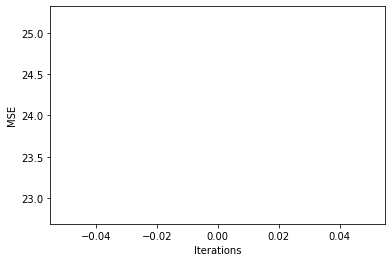

In [42]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 20), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [43]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-7.706, -6.804, -8.998, ..., -2.776, -3.086, -3.071],
       [ 4.233,  3.782,  4.988, ..., -0.341, -0.132, -0.198],
       [11.269,  9.86 , 13.067, ...,  7.741,  8.119,  8.21 ],
       ...,
       [ 2.781,  2.702,  3.496, ..., -9.132, -8.811, -9.128],
       [ 5.7  ,  5.147,  6.771, ..., -2.646, -2.319, -2.474],
       [ 2.466,  1.941,  2.64 , ..., 10.611, 10.509, 10.803]])

In [44]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df2.columns

In [45]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -7.706197806811681)","(8.79, -6.803753246527703)","(-9.66, -8.997655262388488)","(-8.16, -9.743372638651481)","(-7.52, -0.8093986628060652)","(-8.5, -4.141273455642321)","(-9.85, -0.7240670938786496)","(4.17, -0.42893297989934726)","(-8.98, -9.795913915906574)","(-4.76, -4.930152304991857)","(-8.5, -2.5923583330974154)","(-6.75, -2.459055440143375)","(-7.18, -0.30294344404524864)","(8.45, -2.3489768234389214)","(-7.18, -0.2326539698667863)","(-7.52, -0.10725344267248713)","(-7.43, -0.3452333492829258)","(-9.81, -0.5987406244475908)","(-9.85, -0.7904277016400412)","(-9.85, -0.7365321346922648)","(-9.37, -1.4813490892169203)","(1.5, -3.865044587668205)","(-4.37, -5.930498558345281)","(-9.81, -9.35811693578987)","(-8.5, -4.944273992892909)","(1.12, -1.7716221008744601)","(7.82, -1.390637619663612)","(2.86, -1.6514432043183955)","(9.13, -1.3302562037465562)","(-7.43, -8.354001378882328)","(2.14, -1.5370662273889648)","(-4.08, -1.4291335478531801)","(-9.08, -9.375254235203753)","(7.82, -3.502664018637577)","(5.05, -1.4501846941692935)","(4.95, -1.4250918288745469)","(-9.17, -7.956479847411592)","(-8.4, -2.4156934993730235)","(-8.4, -2.348307773053461)","(-8.4, -2.875461712214671)",...,"(8.59, -1.3357714574497082)","(3.59, -1.33040440854965)","(-6.84, -6.811997178213095)","(-9.03, -9.326109669851883)","(2.82, -1.2950799976596203)","(-1.36, -1.3668756592340379)","(-9.08, -9.494231509101953)","(8.3, -1.309134383824172)","(5.68, -1.3498320348478556)","(-4.81, -6.955188707427773)","(99.0, -4.143246698813023)","(99.0, -3.9827166504872125)","(99.0, -4.458157262887949)","(99.0, -4.9481007858302135)","(99.0, -4.905859531125835)","(99.0, -4.943917967521993)","(99.0, -5.289316715985711)","(-9.42, -5.288563021372572)","(99.0, -5.6244262331668)","(99.0, -5.744552914954352)","(99.0, -5.717396889927405)","(-7.72, -5.990257726174785)","(99.0, -5.624207985393816)","(99.0, -5.896478825479779)","(99.0, -5.497543232973316)","(99.0, -5.59950404591638)","(99.0, -5.008586687066401)","(99.0, -4.968007723101521)","(99.0, -4.623589309101176)","(99.0, -4.73600120788691)","(2.82, -4.25647472004228)","(99.0, -4.079226144258596)","(99.0, -3.748384887772964)","(99.0, -3.7892860039459904)","(99.0, -3.2995617239760886)","(99.0, -3.119365799534766)","(-5.63, -2.9546938568799153)","(99.0, -2.7758611716189954)","(99.0, -3.0862745320960463)","(99.0, -3.0712067400726535)"
1,"(4.08, 4.2327420136072265)","(-0.29, 3.7824798701374664)","(6.36, 4.988039592028887)","(4.37, 5.459618394233363)","(-2.38, 0.39927555126355213)","(-9.66, 2.2396122518909167)","(-0.73, 0.40472692594213117)","(-5.34, 0.27689606751860574)","(8.88, 5.504433762853218)","(9.22, 2.748734435570681)","(6.75, 1.3624855412133228)","(8.64, 1.2920048039830616)","(4.42, 0.23901735427435042)","(7.43, 1.2207374939667988)","(4.56, 0.21881507824823734)","(-0.97, 0.21526965427255082)","(4.66, 0.2147818654487992)","(-0.68, 0.3628409455595614)","(3.3, 0.4081218929587408)","(-1.21, 0.42437266568167)","(0.87, 0.6840703995335115)","(8.64, 2.150547621562885)","(8.35, 3.3809626671403197)","(9.17, 5.3481698476428505)","(0.05, 2.7760204737364296)","(7.57, 0.8953230702931907)","(4.71, 0.5825094315080195)","(0.87, 0.8341286761554425)","(-0.39, 0.5523463092292907)","(6.99, 4.766374902647966)","(6.5, 0.7093894375244602)","(-0.92, 0.605673934897199)","(7.14, 5.374349966031729)","(9.03, 1.912624145156646)","(-1.8, 0.612689489855995)","(0.73, 0.5941289803895671)","(7.09, 4.595951248729528)","(3.4, 1.2984090508591817)","(-0.87, 1.2243533905367974)","(7.91, 1.5474429562905196)",...,"(-6.7, 0.5326654566133033)","(-3.35, 0.5170900580904851)","(-9.03, 3.8662100851362413)","(4.47, 5.377699933309203)","(4.08, 0.5149540273466465)","(-3.83, 0.5536977495452401)","(8.74, 5.492807929685375)","(1.12, 0

# Quiz Part

In [47]:
df2.iloc[12609, 30]

3.88

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
quiz_movie_itm = pd.read_excel('/content/drive/MyDrive/movies_latent_factors.xlsx', sheet_name='Items')
quiz_movie_usr = pd.read_excel('/content/drive/MyDrive/movies_latent_factors.xlsx', sheet_name='Users')



In [63]:
quiz_movie_itm.head()

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566


In [64]:
quiz_movie_usr.head()

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [72]:
np.where(quiz_movie_itm['Movie ID']==77)


(array([8]),)

In [71]:
quiz_movie_itm.iloc[8,16]

0.5052651984719501

In [74]:
np.argmax(quiz_movie_itm['Factor5'])

15

In [76]:
quiz_movie_itm.iloc[15,1]

'The Lord of the Rings: The Two Towers (2002)'

## Prediction

In [85]:
copy_items = quiz_movie_itm.drop(['Movie ID','Title'], axis=1)
copy_users = quiz_movie_usr.drop(['User'], axis=1)

In [86]:
copy_items

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
96,1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
97,0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790
98,1.161006,-0.715613,0.712633,-0.688808,-0.717785,-1.007047,-0.267268,-0.802322,-0.249239,-0.540419,-0.291422,-0.240216,0.290714,-1.217250,-0.288130


In [87]:
copy_users

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669
5,-0.020301,-0.031919,-0.036955,0.033690,0.000174,-0.003178,0.054474,0.045424,-0.053308,0.003437,-0.041750,0.059725,-0.021647,0.039873,-0.061857
6,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.189250,0.065990,0.102776
7,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.006670
8,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.019950,-0.014435,0.010926,0.024400,0.005318,-0.007983
9,-0.083093,-0.029160,0.013748,0.022716,-0.062732,-0.080670,-0.019723,0.013253,-0.091305,-0.090687,0.030638,-0.113364,-0.021325,0.181508,0.022357


In [88]:
users_pref= copy_users.values
items_lf= copy_items.values

ratings = users_pref.dot(items_lf.T)
ratings_df= pd.DataFrame(ratings)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.389174,0.191449,0.766364,-0.190918,-0.610322,-0.388917,-0.004002,0.190730,0.268826,1.188110,0.195472,1.075866,0.490713,-0.514578,-0.370327,-0.506850,-0.416795,0.263785,0.069576,-0.461273,-0.168938,0.248981,-0.088369,-0.320207,-0.171628,0.058226,0.287472,0.634223,0.216470,-0.269254,-0.023449,0.532674,0.471114,0.937787,0.414122,0.243899,-0.465304,-1.140411,0.593612,0.080442,...,0.366176,-0.402584,0.050475,0.149423,0.541162,0.661988,0.055876,-0.112212,-0.039461,0.450075,0.525795,-0.361932,-1.052730,0.378917,0.237825,0.309767,-0.154147,0.416629,0.304657,-1.417385,0.061697,-0.266492,-0.079663,0.543639,0.341835,0.129791,-1.246529,0.567501,-0.031013,0.077461,0.526472,-0.053100,0.116875,-0.167823,0.207883,0.248880,-0.264199,-0.395129,-0.522412,0.097010
1,0.883069,0.319496,0.396485,-0.380979,-0.187145,-0.862520,-0.119464,-0.044719,0.082417,0.345774,0.658106,0.510767,-0.125068,-0.151969,0.517930,0.472757,0.561092,-0.221019,-0.129598,-0.208213,-0.225939,0.702483,0.189687,0.337877,-0.260572,-0.292796,0.404124,-0.049005,-0.129483,-0.550813,0.336472,-0.119816,-0.242805,0.293419,0.268176,0.577851,-0.884860,-1.023764,0.199863,0.514953,...,0.304296,0.409391,-0.229632,-0.136578,-0.101327,-0.106959,-0.488648,-0.003041,-0.561891,0.251416,0.269787,0.052700,-0.328004,0.046813,0.016504,-0.218339,-0.111493,0.910234,0.885208,0.409308,-0.218698,0.033565,0.277388,0.277319,0.220398,-0.637950,-1.423655,0.097996,-0.354999,0.122281,-0.500473,0.357837,-0.041433,-0.072079,0.048516,0.062227,-0.179019,-0.259385,-0.455462,-0.113381
2,0.214068,0.154537,0.261073,-0.187174,0.502264,0.447514,-0.258614,-0.293113,-0.104059,0.073767,0.543291,0.045008,-0.059968,-0.036395,0.247560,0.237873,0.285821,-0.316820,-0.344919,-0.128238,-0.466908,0.759871,0.265635,-0.257978,-0.153931,-0.233692,0.360666,0.694714,-0.386115,0.027994,0.428741,0.192190,-0.259231,0.478752,0.327803,0.136766,0.372406,-0.399539,0.271648,0.181640,...,-0.086112,-0.018083,-0.393651,-0.302412,-0.066160,0.209991,0.010296,0.322565,-0.111107,0.228516,0.266962,0.169295,-0.032999,0.283415,0.106452,-0.271994,-0.156425,0.186516,0.101966,-0.421808,-0.256815,-0.018047,-0.302059,0.132926,0.080893,-0.199164,-0.413831,-0.097153,-0.334807,-0.106210,-0.517215,0.667856,-0.217218,-0.390654,-0.111029,0.046301,0.242631,-0.083633,-0.163929,-0.199840
3,-0.139366,0.129855,1.212876,-0.411287,0.484533,-0.865355,-0.162480,-0.028759,-0.096787,-0.187731,0.770433,-0.075722,-0.052166,-0.353584,1.858963,1.892477,1.891704,-0.352995,-0.238122,-0.155691,-0.465392,0.315802,-0.063346,0.164196,0.000219,-0.147500,0.776647,0.060033,-0.237285,-0.605052,-0.105234,0.085034,-0.552006,0.668020,-0.359605,-0.101019,-0.760042,-0.412730,0.558233,0.995228,...,0.468163,0.700335,-0.304751,-0.097778,0.158311,0.559324,0.103477,-0.223986,-0.366725,0.303603,-0.074221,-0.587257,-0.648043,-0.069623,-0.264658,-0.382602,-0.414798,-0.091951,-0.054668,0.499982,-0.226226,0.233677,0.175190,-0.197097,-0.192601,-1.233248,-1.337438,-0.163425,-0.334595,0.352293,-1.370533,0.271769,-0.125226,0.050462,0.132708,-0.197997,-0.307370,0.138995,0.003095,-0.524709
4,-0.038172,0.866052,-0.285316,0.016812,-0.249510,-0.702938,0.144358,-0.233250,0.253279,-0.146575,0.146374,-0.211549,-0.511296,0.149259,-0.215623,-0.246139,-0.158675,-0.085058,-0.153884,0.230182,0.171180,0.817499,0.003485,-0.007810,-0.564633,0.095389,-0.266832,0.163397,-0.165875,-0.066653,0.722882,-0.110033,0.047110,0.069928,-0.051499,0.511015,-0.674589,-0.460420,-0.017807,0.089402,...,0.039535,-0.003985,-0.054086,-0.236235,-0.297127,-0.120728,-0.136538,0.495312,-0.586712,0.165301,0.768090,0.179368,0.173325,0.011385,-0.365406,-0.311510,-0.133716,0.060928,-0.106457,-0.492626,-0.105881,-0.162837,-0.351193,0.174816,0.167268,-0.399136,-0.295934,-0.134954,0.082399,-0.098494,-0.282529,0.750208,

In [106]:
ratings_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.389174,0.191449,0.766364,-0.190918,-0.610322,-0.388917,-0.004002,0.190730,0.268826,1.188110,0.195472,1.075866,0.490713,-0.514578,-0.370327,-0.506850,-0.416795,0.263785,0.069576,-0.461273,-0.168938,0.248981,-0.088369,-0.320207,-0.171628,0.058226,0.287472,0.634223,0.216470,-0.269254,-0.023449,0.532674,0.471114,0.937787,0.414122,0.243899,-0.465304,-1.140411,0.593612,0.080442,...,0.366176,-0.402584,0.050475,0.149423,0.541162,0.661988,0.055876,-0.112212,-0.039461,0.450075,0.525795,-0.361932,-1.052730,0.378917,0.237825,0.309767,-0.154147,0.416629,0.304657,-1.417385,0.061697,-0.266492,-0.079663,0.543639,0.341835,0.129791,-1.246529,0.567501,-0.031013,0.077461,0.526472,-0.053100,0.116875,-0.167823,0.207883,0.248880,-0.264199,-0.395129,-0.522412,0.097010
1,0.883069,0.319496,0.396485,-0.380979,-0.187145,-0.862520,-0.119464,-0.044719,0.082417,0.345774,0.658106,0.510767,-0.125068,-0.151969,0.517930,0.472757,0.561092,-0.221019,-0.129598,-0.208213,-0.225939,0.702483,0.189687,0.337877,-0.260572,-0.292796,0.404124,-0.049005,-0.129483,-0.550813,0.336472,-0.119816,-0.242805,0.293419,0.268176,0.577851,-0.884860,-1.023764,0.199863,0.514953,...,0.304296,0.409391,-0.229632,-0.136578,-0.101327,-0.106959,-0.488648,-0.003041,-0.561891,0.251416,0.269787,0.052700,-0.328004,0.046813,0.016504,-0.218339,-0.111493,0.910234,0.885208,0.409308,-0.218698,0.033565,0.277388,0.277319,0.220398,-0.637950,-1.423655,0.097996,-0.354999,0.122281,-0.500473,0.357837,-0.041433,-0.072079,0.048516,0.062227,-0.179019,-0.259385,-0.455462,-0.113381
2,0.214068,0.154537,0.261073,-0.187174,0.502264,0.447514,-0.258614,-0.293113,-0.104059,0.073767,0.543291,0.045008,-0.059968,-0.036395,0.247560,0.237873,0.285821,-0.316820,-0.344919,-0.128238,-0.466908,0.759871,0.265635,-0.257978,-0.153931,-0.233692,0.360666,0.694714,-0.386115,0.027994,0.428741,0.192190,-0.259231,0.478752,0.327803,0.136766,0.372406,-0.399539,0.271648,0.181640,...,-0.086112,-0.018083,-0.393651,-0.302412,-0.066160,0.209991,0.010296,0.322565,-0.111107,0.228516,0.266962,0.169295,-0.032999,0.283415,0.106452,-0.271994,-0.156425,0.186516,0.101966,-0.421808,-0.256815,-0.018047,-0.302059,0.132926,0.080893,-0.199164,-0.413831,-0.097153,-0.334807,-0.106210,-0.517215,0.667856,-0.217218,-0.390654,-0.111029,0.046301,0.242631,-0.083633,-0.163929,-0.199840
3,-0.139366,0.129855,1.212876,-0.411287,0.484533,-0.865355,-0.162480,-0.028759,-0.096787,-0.187731,0.770433,-0.075722,-0.052166,-0.353584,1.858963,1.892477,1.891704,-0.352995,-0.238122,-0.155691,-0.465392,0.315802,-0.063346,0.164196,0.000219,-0.147500,0.776647,0.060033,-0.237285,-0.605052,-0.105234,0.085034,-0.552006,0.668020,-0.359605,-0.101019,-0.760042,-0.412730,0.558233,0.995228,...,0.468163,0.700335,-0.304751,-0.097778,0.158311,0.559324,0.103477,-0.223986,-0.366725,0.303603,-0.074221,-0.587257,-0.648043,-0.069623,-0.264658,-0.382602,-0.414798,-0.091951,-0.054668,0.499982,-0.226226,0.233677,0.175190,-0.197097,-0.192601,-1.233248,-1.337438,-0.163425,-0.334595,0.352293,-1.370533,0.271769,-0.125226,0.050462,0.132708,-0.197997,-0.307370,0.138995,0.003095,-0.524709
4,-0.038172,0.866052,-0.285316,0.016812,-0.249510,-0.702938,0.144358,-0.233250,0.253279,-0.146575,0.146374,-0.211549,-0.511296,0.149259,-0.215623,-0.246139,-0.158675,-0.085058,-0.153884,0.230182,0.171180,0.817499,0.003485,-0.007810,-0.564633,0.095389,-0.266832,0.163397,-0.165875,-0.066653,0.722882,-0.110033,0.047110,0.069928,-0.051499,0.511015,-0.674589,-0.460420,-0.017807,0.089402,...,0.039535,-0.003985,-0.054086,-0.236235,-0.297127,-0.120728,-0.136538,0.495312,-0.586712,0.165301,0.768090,0.179368,0.173325,0.011385,-0.365406,-0.311510,-0.133716,0.060928,-0.106457,-0.492626,-0.105881,-0.162837,-0.351193,0.174816,0.167268,-0.399136,-0.295934,-0.134954,0.082399,-0.098494,-0.282529,0.750208,

In [91]:
us_id = quiz_movie_usr['User'].values
it_id = quiz_movie_itm['Movie ID'].values

resx =np.where(us_id == 2848)
resy=np.where(it_id == 585)
print(resx, resy)

(array([13]),) (array([46]),)


In [92]:
ratings_df.iloc[resx[0],resy[0]]

,46
13,-0.093694


In [94]:
recx =np.where(us_id == 525)
recy=np.where(it_id == 36658)
print(recx, recy)
ratings_df.iloc[recx[0],recy[0]]

(array([20]),) (array([98]),)


,98
20,-0.190195


In [95]:
rec=np.where(us_id == 4327)
print(rec)

(array([21]),)


In [112]:
ratings_df.iloc[21,]

0    -0.571045
1     0.701410
2     0.957224
3     0.312992
4    -0.362200
        ...   
95    0.568636
96    0.228117
97   -0.071025
98   -0.133544
99   -0.000380
Name: 21, Length: 100, dtype: float64

In [110]:
c1 = ratings_df.iloc[21,0]
c2 = ratings_df.iloc[21,1]
c3 = ratings_df.iloc[21,2]
for i in ratings_df.columns:
  if ratings_df.iloc[21,i]>c1:
    c3 = c2
    c2 = c1
    c1 = ratings_df.iloc[21,i]
    c2 
  print()

-0.5710447421626832
0.7014102005863814
0.9572237810856432
0.312991853095906
-0.36219961595156336
-0.13850194245500977
0.03408537148928563
-0.1760652096697719
0.16623454753545183
0.3773103476091399
0.19171397165064627
0.8045375250993226
-0.36537915923647346
0.33582866788018867
-2.000204244215841
-2.024218771859564
-2.005247522746458
-0.2517635226151387
-0.3387595065735706
-0.19546726260409816
-0.1410329189654541
0.11337944326384469
-0.2787115203703431
-0.05565321053695628
-0.4484539014033465
0.1835153622264103
-0.06581660899661032
0.6124871105131405
-0.3319226191530666
0.014336936944077847
-0.041705465983532426
0.447399703199497
0.08904923064057751
0.5892183531991054
0.8358493146023396
1.0675675245300227
-0.2606152700844721
-0.5550372993745314
0.4747810775923505
0.29885236189927805
-0.07251426380798792
-0.06093191240926381
0.6853733091064206
0.5785462887204147
0.0524647491686456
-0.06468123357330273
0.36571990762004003
1.3860422227435412
0.8482318673812743
0.4409101870292044
0.406526293